In [2]:
import numpy as np
import pandas as pd

In [8]:
# читаем файл с лематизированным датасетом
# читаем лематизированный текст
# load dataset from file csv
f = 'C:/koltcov_python_scripts/Project_2022-23/etnohate_2023/neurol_network/final_dataset_drop_dubl.csv'

#df=pd.read_csv(f,  sep=';', encoding='utf8')
#df=pd.read_csv(f,  sep=';', encoding='cp1252' )
#df=pd.read_csv(f,  sep=';', encoding='Latin-1')
#df=pd.read_csv(f,  sep=';', encoding='ANSI')

# читаем xls файлы
df1 = pd.read_csv(f,  sep=';', encoding='utf8')


# this gives us the size of the array
print('Dataset size', df1.shape)

# here we can get size of array as two variables
num_rows1, num_feature1 = df1.shape

print('row number: ', num_rows1)
print('feature number: ', num_feature1)
print()
print('names of features: ', list(df1))

Dataset size (17474, 3)
row number:  17474
feature number:  3

names of features:  ['Unnamed: 0', 'is_ethicity_superior_meaning', 'code_text']


In [6]:
df1

,Unnamed: 0,is_ethicity_superior_meaning,code_text
0,0,irrel,тибетец Музыка Китая – одна из древнейших в ми...
1,1,irrel,"тибетец [[id9183485|Юрий], В число 55 национал..."
2,2,irrel,"тибетец русофоб?! пфффф.. <br/> милок, ты слиш..."
3,3,irrel,"тибетец Узбекистан и Иран - унитарные, и со ст..."
4,4,irrel,монгол Музыка Китая – одна из древнейших в мир...
...,...,...,...
17469,17469,irrel,ливиец Статья интересная))но она такая же бесп...
17470,17470,irrel,"киприот [[id200150463|Руслан], ну жители Велик..."
17471,17471,irrel,"саудовец Дзидек , ЖИД НЕ НАЦИОНАЛЬНОСТЬ , А МИ..."
17472,17472,irrel,"малаец Сань, когда эти долбаные ящики передали..."


In [4]:
# для удобства сделаем замену имен колонок
#df1.rename(columns = {'0':'docs'}, inplace = True )
del df1['Unnamed: 0']

In [5]:
# трансформируем все в колонке 'code_text' в нижний регистр
df1['code_text'] = df1['code_text'].str.lower()

In [6]:
df1

,is_ethicity_superior_meaning,code_text
0,irrel,тибетец музыка китая – одна из древнейших в ми...
1,irrel,"тибетец [[id9183485|юрий], в число 55 национал..."
2,irrel,"тибетец русофоб?! пфффф.. <br/> милок, ты слиш..."
3,irrel,"тибетец узбекистан и иран - унитарные, и со ст..."
4,irrel,монгол музыка китая – одна из древнейших в мир...
...,...,...
17469,irrel,ливиец статья интересная))но она такая же бесп...
17470,irrel,"киприот [[id200150463|руслан], ну жители велик..."
17471,irrel,"саудовец дзидек , жид не национальность , а ми..."
17472,irrel,"малаец сань, когда эти долбаные ящики передали..."


In [7]:
# уберем самый большой класс
irrel_df= df1[df1["is_ethicity_superior_meaning"] == "irrel"]
high_df= df1[df1["is_ethicity_superior_meaning"] == "high"]
low_df= df1[df1["is_ethicity_superior_meaning"] == "low"]

In [8]:
new_data = pd.concat([high_df, low_df])
print(new_data.shape)

(2123, 2)


In [9]:
# теперь сделаем перемешивание и востановление индекса
from sklearn.utils import shuffle
shuf_data = shuffle(new_data)
print(list(shuf_data))
shuf_data.shape

['is_ethicity_superior_meaning', 'code_text']


(2123, 2)

In [10]:
# востановим индексы
shuf_data.index = np.arange(len(shuf_data))

high     545
low     1578
Name: is_ethicity_superior_meaning, dtype: int64


<AxesSubplot:>

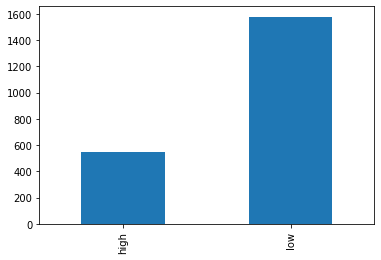

In [98]:
# давайте посмотрим распределение оценок
import matplotlib.pyplot as plt
%matplotlib inline
# value_counts () - a command that allows you to calculate the number of unique values
vc = shuf_data['is_ethicity_superior_meaning'].value_counts()
vc = vc.sort_index()
print(vc)
vc.plot(kind='bar')

In [11]:
df1=shuf_data

In [100]:
# Теперь, для того что бы подать документы и лейблы в нейронную сеть
# нужно сделать небольшой препроцессинг
# 1. нужно токенезировать
# 2. преобразовать токены в набор нулей и единиц

In [174]:
# проведем токенизацию с помощью keras
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(df1['code_text'])

In [175]:
# кодируем документы в нули и единицы
encoded_docs = t.texts_to_matrix(df1['code_text'], mode='count')
print(encoded_docs)
# Такие документы можно подавать на вход сети

[[0. 4. 0. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 ...
 [0. 2. 1. ... 0. 0. 0.]
 [0. 2. 1. ... 0. 0. 0.]
 [0. 2. 4. ... 1. 1. 1.]]


In [176]:
# размер матрицы
print(encoded_docs.shape)
num_doc, num_words = encoded_docs.shape

(2123, 22687)


In [188]:
# досемплирования датасета
#объединим препроцеснутые тексты и лейблы
result = pd.concat([pd.DataFrame(encoded_docs), df1['is_ethicity_superior_meaning']], axis=1)
#result.shape
high_doc_df= result[result["is_ethicity_superior_meaning"] == "high"]
low_doc_df= result[result["is_ethicity_superior_meaning"] == "low"]

In [196]:
vc = low_doc_df['is_ethicity_superior_meaning'].value_counts()
vc = vc.sort_index()
print(vc)

low    1578
Name: is_ethicity_superior_meaning, dtype: int64


In [197]:
# теперь произведем досемплирование маленького класса
from sklearn.utils import resample
print('До сэмплирования', high_doc_df.shape)
high_upsample = resample(high_doc_df, replace=True, n_samples=1600,  random_state=42)
print('после сэмплирования ', high_upsample.shape)

До сэмплирования (545, 22688)
после сэмплирования  (1600, 22688)


In [198]:
# теперь объединяем два ккласса и потом делаем перемешивание
final_df = pd.concat([low_doc_df, high_upsample])
final_df.shape

(3178, 22688)

In [199]:
vc = final_df['is_ethicity_superior_meaning'].value_counts()
vc = vc.sort_index()
print(vc)

high    1600
low     1578
Name: is_ethicity_superior_meaning, dtype: int64


In [200]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,22678,22679,22680,22681,22682,22683,22684,22685,22686,is_ethicity_superior_meaning
0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
1,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
3,0.0,4.0,3.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
4,0.0,2.0,4.0,4.0,2.0,1.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
5,0.0,2.0,4.0,1.0,2.0,8.0,1.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high
1461,0.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high
1946,0.0,4.0,0.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high
2093,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high


In [201]:
# теперь сделаем перемешивание и востановление индекса
from sklearn.utils import shuffle
shuf_data = shuffle(final_df)
# востановим индексы
shuf_data.index = np.arange(len(shuf_data))
shuf_data.shape

(3178, 22688)

In [202]:
my_label = shuf_data['is_ethicity_superior_meaning']
del shuf_data['is_ethicity_superior_meaning']   
print(my_label.shape)
print(shuf_data.shape)

(3178,)
(3178, 22687)


In [203]:
# Разделим наш датасет на тренировочную и тестовую часть
from sklearn.model_selection import train_test_split
# делим даанные на тестовую и тренировочную коллекцию
#x_train, x_valid, y_train, y_valid = train_test_split(final_df, my_label, test_size=0.2, stratify=df1['is_ethicity_superior_meaning'])
x_train, x_valid, y_train, y_valid = train_test_split(shuf_data, my_label, test_size=0.2)

print('x_train: ', x_train.shape)
print('x_valid: ', x_valid.shape)
print('------------------------------')
print('y_train: ' , y_train.shape)
print('y_valid: ' , y_valid.shape)

x_train:  (2542, 22687)
x_valid:  (636, 22687)
------------------------------
y_train:  (2542,)
y_valid:  (636,)


In [204]:
# теперь сделаем препоцессинг лейблов
y_dummy_train = pd.get_dummies(y_train)
y_dummy_train

,high,low
1910,1,0
504,1,0
2617,1,0
823,1,0
305,1,0
...,...,...
2118,1,0
616,0,1
3169,0,1
2331,0,1


In [205]:
y_dummy_valid = pd.get_dummies(y_valid)
y_dummy_valid

,high,low
1117,1,0
1566,0,1
1350,0,1
2599,0,1
2129,1,0
...,...,...
2808,1,0
965,1,0
1205,1,0
1118,1,0


# простая сеть

In [143]:
# создание сети
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(22687,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# Dropout - дает возможно забывать сетью часть своих нейронов
model.add(layers.Dropout(0.1))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 64)                1452032   
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 2)                 130       
                                                                 
Total params: 1,460,482
Trainable params: 1,460,482
Non-trainable params: 0
_________________________________________________________________


# RNN сеть

In [148]:
# построение модели
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import SimpleRNN, Reshape
from keras import layers

model = Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(22687,)))
model.add(Reshape((1, 64)))
model.add(SimpleRNN(64))
model.add(Dense(64, activation='relu'))
# Dropout - дает возможно забывать сетью часть своих нейронов
model.add(layers.Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                1452032   
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 2)                

# LST-GRU сеть

In [206]:
# построение модели
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import SimpleRNN, Reshape
from keras import layers
from keras.layers import LSTM

model = Sequential()

model.add(layers.Dense(64, activation='ELU', input_shape=(22687,)))
model.add(Reshape((1, 64)))

#model.add(LSTM(64))
#model.add(Reshape((1, 64)))
model.add(layers.GRU(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(None,)))
model.add(Dense(64, activation='ELU'))
# Dropout - дает возможно забывать сетью часть своих нейронов
model.add(layers.Dropout(0.1))
model.add(Dense(64, activation='ELU'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                1452032   
                                                                 
 reshape_14 (Reshape)        (None, 1, 64)             0         
                                                                 
 gru_8 (GRU)                 (None, 64)                24960     
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 dense_58 (Dense)            (None, 2)               

In [207]:
# 2. компиляция сети
# теперь нужно скомпелировать нашу сеть
# optimizer='rmsprop' - алгоритм обучения сети
# loss='categorical_crossentropy'
# metrics=['accuracy'] - тип метрики качества
# loss='categorical_crossentropy' - функция потерь, которая будет минимизироваться
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [208]:
# 3. обучение сети
# запускаем процесс обучения сети
# x_train, y_train - датасет на котором обучаем сеть
# epochs=9 - число эпох обучения
# batch_size=512
# validation_data - датасет на котором производится проверка качества обученной модели
model.fit(x_train, y_dummy_train, epochs=25, batch_size=512, validation_data=(x_valid, y_dummy_valid))

Epoch 1/25
5/5 [==============================] - 3s 194ms/step - loss: 0.6066 - accuracy: 0.6640 - val_loss: 0.4649 - val_accuracy: 0.7956
Epoch 2/25
5/5 [==============================] - 0s 90ms/step - loss: 0.2775 - accuracy: 0.9138 - val_loss: 0.4113 - val_accuracy: 0.8569
Epoch 3/25
5/5 [==============================] - 0s 98ms/step - loss: 0.2019 - accuracy: 0.9249 - val_loss: 0.3981 - val_accuracy: 0.8506
Epoch 4/25
5/5 [==============================] - 0s 95ms/step - loss: 0.1752 - accuracy: 0.9253 - val_loss: 0.4112 - val_accuracy: 0.8585
Epoch 5/25
5/5 [==============================] - 0s 97ms/step - loss: 0.1588 - accuracy: 0.9264 - val_loss: 0.4088 - val_accuracy: 0.8616
Epoch 6/25
5/5 [==============================] - 0s 86ms/step - loss: 0.1465 - accuracy: 0.9355 - val_loss: 0.4166 - val_accuracy: 0.8538
Epoch 7/25
5/5 [==============================] - 0s 84ms/step - loss: 0.1487 - accuracy: 0.9375 - val_loss: 0.3947 - val_accuracy: 0.8569
Epoch 8/25
5/5 [==========

In [209]:
# выводим качество работы сети
results = model.evaluate(x_valid, y_dummy_valid)

20/20 [==============================] - 0s 6ms/step - loss: 0.6119 - accuracy: 0.8852


In [210]:
print(results)

[0.6118736267089844, 0.8852201104164124]


In [212]:
# Предсказание
predictions = model.predict(x_valid)
#  число оценок и размер оценок в предсказании
print(predictions.shape)
#print(predictions)

(636, 2)


In [213]:
# Давайте оценим результат предсказания по классам - 2 класса
# Для этого преобразуем полученные вероятности по классам в конкретный класс
# то есть в качестве итогового класса берется класс с максимальной вероятностью
y_preds = np.argmax(predictions, axis=1).tolist()

for i in range(len(y_preds)):
    if y_preds[i]==1: y_preds[i]='low'
    if y_preds[i]==0: y_preds[i]='high'

In [71]:
# Давайте оценим результат предсказания по классам
# Для этого преобразуем полученные вероятности по классам в конкретный класс
# то есть в качестве итогового класса берется класс с максимальной вероятностью
#y_preds = np.argmax(predictions, axis=1).tolist()
# 2- positive
# 1- neutral
# 0- negative
#for i in range(len(y_preds)):
#    if y_preds[i]==2: y_preds[i]='low'
#    if y_preds[i]==1: y_preds[i]='irrel'
#    if y_preds[i]==0: y_preds[i]='high'

In [54]:
# получили предсказание в терминах классов
#y_preds

In [214]:
# также сделаем обратное преобразование лейблов из тестового датасета обратно в классы
yy = y_dummy_valid.idxmax(axis=1)

In [58]:
#yy

In [215]:
#  Теперь мы можем расчитать качество по каждому классу
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_preds, yy))

              precision    recall  f1-score   support

        high       0.92      0.86      0.89       340
         low       0.85      0.92      0.88       296

    accuracy                           0.89       636
   macro avg       0.89      0.89      0.89       636
weighted avg       0.89      0.89      0.89       636

